In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import re
import csv

In [2]:
from selenium.webdriver.common.keys import Keys #подгружаем Selenium

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.support import expected_conditions as EC

from selenium.webdriver.support.ui import WebDriverWait

options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

from selenium.webdriver.common.by import By

In [ ]:
from selenium.common.exceptions import TimeoutException, NoSuchElementException, ElementClickInterceptedException, UnexpectedAlertPresentException #импортируем модули Selenium для успешного парсинга большого количества страниц

In [4]:
from collections import Counter

In [ ]:
from wordcloud import WordCloud

In [ ]:
from selenium import webdriver #открываем в браузере Chrome нужную страницу (форму поиска документов)

driver = webdriver.Chrome()

driver.get('https://podvignaroda.ru/?#tab=navDocuments_search')

In [ ]:
selector = '#searchDocuments0 > form > button' #создаём код, который имитирует действия пользователя при поиске документов на сайте
search = driver.find_element(By.CSS_SELECTOR, selector)
search.click()

In [ ]:
all_tags = []

In [ ]:



for i in range(3000): #код, позволяющий парсить много страниц даже при условии, что какие-то из них могут не отвечать
    try:
       WebDriverWait(driver, 10).until(lambda d: d.execute_script('return document.readyState') == 'complete')

        
       html_code = driver.page_source
       soup = BeautifulSoup(html_code, 'html.parser')
       for tag in soup.find_all('div', {'class': "col-sm-4", 'bo-text': "record.f19||'Источник не указан'"}):
        all_tags.append(tag.text)

        
        time.sleep(1)

       
        next_btn = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#idnextpage')))
        next_btn.click()

    except UnexpectedAlertPresentException:
        
        try:
            alert = driver.switch_to.alert
            alert.dismiss()  
            print(f"Страница {i+1}: закрыли всплывающее окно, пропускаем её.")
        except Exception as e:
            print(f"Страница {i+1}: не удалось закрыть всплывающее окно: {e}")
        continue  

    except TimeoutException:
        print(f"Страница {i+1}: время ожидания истекло, прекращаем парсинг.")
        break

    except NoSuchElementException:
        print(f"Страница {i+1}: кнопка следующей страницы не найдена, прекращаем парсинг.")
        break

    except ElementClickInterceptedException:
        print(f"Страница {i+1}: не удалось кликнуть по кнопке следующей страницы, прекращаем парсинг.")
        break

    except Exception as e:
        print(f"Страница {i+1}: непредвиденная ошибка: {e}")
        break

driver.quit()


Страница 228: не удалось закрыть всплывающее окно: Message: no such alert
  (Session info: chrome=145.0.7632.111)
Stacktrace:
Symbols not available. Dumping unresolved backtrace:
	0x7ff75e56aa55
	0x7ff75e2c8630
	0x7ff75e05d546
	0x7ff75e04c774
	0x7ff75e087004
	0x7ff75e0e1a6d
	0x7ff75e086e85
	0x7ff75e0a9098
	0x7ff75e0a9f83
	0x7ff75e597810
	0x7ff75e591afd
	0x7ff75e5b2c1a
	0x7ff75e2e3345
	0x7ff75e2eb81c
	0x7ff75e2d1924
	0x7ff75e2d1ad6
	0x7ff75e2b7e47
	0x7ffb16ad7374
	0x7ffb1703cc91

Страница 342: не удалось закрыть всплывающее окно: Message: no such alert
  (Session info: chrome=145.0.7632.111)
Stacktrace:
Symbols not available. Dumping unresolved backtrace:
	0x7ff75e56aa55
	0x7ff75e2c8630
	0x7ff75e05d546
	0x7ff75e04c774
	0x7ff75e087004
	0x7ff75e0e1a6d
	0x7ff75e086e85
	0x7ff75e0a9098
	0x7ff75e0a9f83
	0x7ff75e597810
	0x7ff75e591afd
	0x7ff75e5b2c1a
	0x7ff75e2e3345
	0x7ff75e2eb81c
	0x7ff75e2d1924
	0x7ff75e2d1ad6
	0x7ff75e2b7e47
	0x7ffb16ad7374
	0x7ffb1703cc91

Страница 369: не удалось закрыть

In [ ]:
len(all_tags)

550

In [ ]:
print(all_tags)

['Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Источник не указан', 'Источник не указан', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Источник не указан', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Источник не указан', 'Источник не указан', 'Источник не указан', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Источник не указан', 'Источник не указан', 'Источник не указан', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Источник не указан', 'Президиум ВС СССР', 'Президиум ВС СССР', 'Президиум ВС СССР', 'И

In [ ]:
result = ', '.join(all_tags) #собираем результаты парсинга, которые пока представляют собой слова или целые фразы
print(result)

Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Источник не указан, Источник не указан, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Источник не указан, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Источник не указан, Источник не указан, Источник не указан, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Источник не указан, Источник не указан, Источник не указан, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Источник не указан, Президиум ВС СССР, Президиум ВС СССР, Президиум ВС СССР, Источник не указан, Источник не указан, ВС ЮФ, 2 гв. ап РГК, 49 гв. сп 16 гв. сд, 49 гв. сп 16 гв

In [ ]:
reduction = re.sub(r'[0-9]', '', result) #выделяем сокращения и аббревиатуры

red = re.findall(r'\s([А-ЯЁа-яё]{1,6})\s', reduction)
print(red)

['ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'не', 'не', 'ВС', 'ВС', 'ВС', 'не', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'не', 'не', 'не', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'не', 'не', 'не', 'ВС', 'ВС', 'ВС', 'не', 'ВС', 'ВС', 'ВС', 'не', 'не', 'ВС', 'ап', 'сп', 'сп', 'опс', 'А', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'ап', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'А', 'сп', 'сд', 'А', 'сп', 'сд', 'А', 'сп', 'сд', 'сп', 'сд', 'зенап', 'зенап', 'иптап', 'иптап', 'иптап', 'тк', 'А', 'сп', 'сд', 'ВС', 'А', 'ВС', 'А', 'ВС', 'А', 'ВС', 'ВС', 'ВС', 'А', 'ВС', 'А', 'ВС', 'А', 'ВС', 'А', 'ВС', 'ВС', 'ВС', 'А', 'ВС', 'ВС', 'ВС', 'район', 'район', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'А', 'ВС', 'ВС', 'оисбр', 'тбр', 'тбр', 'тбр', 'тбр', 'тбр', 'сп', 'сд', 'гап', 'РГК', 'А', 'ВС', 'А', 'ВС', 'ВС', 'ВС', 'ск', 'А', 'минбр', 'адп', 'тбр', 'артд', 'артд', 'артд', 'артд', 'ошисбр', 'ошисбр', 'пабр', '

In [ ]:
stop_words = ['не'] #создаём список стоп-слов, в который на этот раз попало только слово "не", которое не является сокращением, но попадает под условие регулярного выражения; этот список можно при желании дополнить
clean_words = []
for word in red:
    if word not in stop_words:
        clean_words.append(word)
print(clean_words)

['ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'ап', 'сп', 'сп', 'опс', 'А', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'ап', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'сп', 'сд', 'А', 'сп', 'сд', 'А', 'сп', 'сд', 'А', 'сп', 'сд', 'сп', 'сд', 'зенап', 'зенап', 'иптап', 'иптап', 'иптап', 'тк', 'А', 'сп', 'сд', 'ВС', 'А', 'ВС', 'А', 'ВС', 'А', 'ВС', 'ВС', 'ВС', 'А', 'ВС', 'А', 'ВС', 'А', 'ВС', 'А', 'ВС', 'ВС', 'ВС', 'А', 'ВС', 'ВС', 'ВС', 'район', 'район', 'ВС', 'ВС', 'ВС', 'ВС', 'ВС', 'А', 'ВС', 'ВС', 'оисбр', 'тбр', 'тбр', 'тбр', 'тбр', 'тбр', 'сп', 'сд', 'гап', 'РГК', 'А', 'ВС', 'А', 'ВС', 'ВС', 'ВС', 'ск', 'А', 'минбр', 'адп', 'тбр', 'артд', 'артд', 'артд', 'артд', 'ошисбр', 'ошисбр', 'пабр', 'артд', 'оминбр', 'габр', 'артд', 'габр', 'артд', 'отбр', 'А', 'сд', 'А',

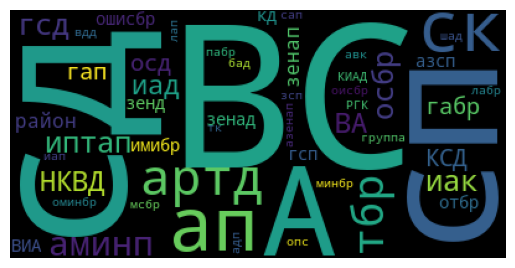

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(Counter(clean_words)) #создаём облако слов, чтобы увидеть наиболее частотные и заодно убедиться, что в список не попали лишние слова
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

In [ ]:
len(set(clean_words))

52

In [ ]:
set(clean_words) #создаём множество из сокращений и аббревиатур

{'А',
 'ВА',
 'ВИА',
 'ВС',
 'КИАД',
 'КСД',
 'НКВД',
 'РГК',
 'авк',
 'адп',
 'азенап',
 'азсп',
 'аминп',
 'ап',
 'артд',
 'бад',
 'вдд',
 'габр',
 'гап',
 'группа',
 'гсд',
 'гсп',
 'зенад',
 'зенап',
 'зенд',
 'зсп',
 'иад',
 'иак',
 'иап',
 'имибр',
 'иптап',
 'кд',
 'лабр',
 'лап',
 'минбр',
 'мсбр',
 'оисбр',
 'оминбр',
 'опс',
 'осбр',
 'осд',
 'отбр',
 'ошисбр',
 'пабр',
 'район',
 'сап',
 'сд',
 'ск',
 'сп',
 'тбр',
 'тк',
 'шад'}

In [ ]:
with open ('список сокращений.txt', encoding= 'utf-8') as f: #открываем файл с полным перечнем сокращений и аббревиатур
    source_text = f.read()

In [10]:
clear_text = re.sub(r'\[[0-9*]\]', '', source_text) #чистим перечень от лишних символов
print(clear_text)

ААРМ армейская артиллерийская ремонтная мастерская 
АБ автобронетанковый 
АБТ автобронетанковый 
АБТ автобронетанковый 
АБТВ автобронетанковое вооружение (войска) 
АБТВ автобронетанковое вооружение (войска) 
АБТВ автобронетанковые войска 
АБТМ автобронетанковая мастерская 
АБТМ автобронетанковая мастерская 
АБТО автобронетанковый отдел 
АБТУ автобронетанковое управление 
АВАД армейская военно-автомобильная дорога 
АВАД армейская военно-автомобильная дорога 
АВВСПВО армия ВВС и ПВО 
АВЛ армейский ветлазарет 
АВП армия Войска Польского 
АГ армейская группа 
АГ армейская группа 
АГШ Академия Генерального штаба 
АДД авиация дальнего действия, артиллерия дальнего действия 
АДД авиация дальнего действия 
АДД авиация дальнего действия 
АДЦ авиация дальнего действия 
АЗ аэростат заграждения 
АИР артиллерийская инструментальная разведка 
АК армейский корпус 
АК армейский корпус 
АККУКС Артиллерийские Краснознаменные курсы усовершенствования командного состава 
АКУКС артиллерийские курсы усоверш

In [ ]:
d = {} #создаём словарь из приведённого выше перечня

for line in clear_text.split('\n'):
    parts = line.split()
    if not parts:         
        continue
    key = parts[0]
    value = ' '.join(parts[1:])
    d[key] = value

print("Словарь военных сокращений и аббревиатур:")
for key, value in d.items():
    print(f"{key}: {value}")

Словарь военных сокращений и аббревиатур:
ААРМ: армейская артиллерийская ремонтная мастерская
АБ: автобронетанковый
АБТ: автобронетанковый
АБТВ: автобронетанковые войска
АБТМ: автобронетанковая мастерская
АБТО: автобронетанковый отдел
АБТУ: автобронетанковое управление
АВАД: армейская военно-автомобильная дорога
АВВСПВО: армия ВВС и ПВО
АВЛ: армейский ветлазарет
АВП: армия Войска Польского
АГ: армейская группа
АГШ: Академия Генерального штаба
АДД: авиация дальнего действия
АДЦ: авиация дальнего действия
АЗ: аэростат заграждения
АИР: артиллерийская инструментальная разведка
АК: армейский корпус
АККУКС: Артиллерийские Краснознаменные курсы усовершенствования командного состава
АКУКС: артиллерийские курсы усовершенствования командного состава
АМП: артиллерийский метеорологический пост
АНО: аэронавигационные огни
АНП: артиллерийский наблюдательный пункт ( внесено дополнение)
АОН: артиллерия особого назначения, армия особого назначения
АОНР: артиллерия особого назначения республики
АП: авиа

In [ ]:
with open('dictionary.csv', 'w', newline='', encoding='utf-8') as f: #записываем словарь в csv-файл
    writer = csv.writer(f, delimiter=';')
    writer.writerow(['Ключ', 'Значение'])
    for key, value in d.items():
        writer.writerow([key, value])

In [ ]:
def find_all_matches(d, clean_words): #ищем совпадения в большом словаре и результатах сайта "Подвиг народа"
    matches = []
    for word in clean_words:
        if word in d:
            matches.append((word, d[word]))
    return matches


In [ ]:
all_matches = find_all_matches(d, clean_words)

In [ ]:
if all_matches: #выводим сокращения и аббревиатуры, используемые на сайте "Подвиг народа" с расшифровками из словаря
    print("Найдены следующие совпадения:")
    for key, value in set(all_matches):
        print(f"  '{key}' = {value}")
else:
    print("Совпадений не обнаружено.")

Найдены следующие совпадения:
  'кд' = кавалерийская дивизия
  'ск' = стрелковый корпус
  'пабр' = пушечная артиллерийская бригада
  'бад' = бомбардировочная авиационная дивизия
  'минбр' = минометная бригада
  'шад' = штурмовая авиационная дивизия
  'азсп' = армейский запасный стрелковый полк
  'зенад' = зенитная артиллерийская дивизия
  'ВИА' = воздушная истребительная армия
  'гсп' = горнострелковый полк
  'ВА' = воздушная армия
  'лабр' = легкая артиллерийская бригада
  'НКВД' = Народный комиссариат внутренних дел
  'осбр' = отдельная стрельковая бригада
  'иак' = истребительный авиационный корпус
  'сд' = стрелковая дивизия
  'сп' = стрелковый полк
  'сап' = самоходный артиллерийский полк
  'иад' = истребительная авиационная дивизия
  'лап' = легкий артиллерийский полк
  'мсбр' = мотострелковая бригада
  'РГК' = резерв Главного командования
  'тк' = танковый корпус
  'габр' = гаубичная артиллерийская бригада
  'гсд' = горнострелковая дивизия
  'зсп' = запасный стрелковый полк
  'В

In [ ]:
#подгружаем текст для поиска в нём сокращений и их расшифровки; это текст из боевого журнала
res_text = '''238 сд – КРАСНАЯ ПОЛЯНА, КОХАНОВА, ЧЕКАЛИНО, СЛОБОДА, НЕМЕРЬ; 
413 сд сосредоточилась в районе БОРОНЕВО, ПРОЛЕТАРИЙ, ЛИВАДИЯ; 
324 и 108 сд отразив в течение дня несколько сильных контратак противника овладели ДУБРОВКА и вели бой на рубеже: ЛИПОВКА, ДАВЫДИЧИ, п. ЧАНОВКА, КЛОПОТНЯ; 
380 сд в это-же время вышла на линию: ЛЮБИМОВКА, отм .212,7 , РАДЕНКОВ, клх. БЕДНЯК. 
С 20.9 войска Брянского фронта переходят к преследованию противника но всему фронту, с ближайшей задачей овладеть рокадной жел. дорогой на участке КРИЧЕВ, СУРАЖ, УНЕЧЯ, ВИТОМЛЯ. 
Приказом командующего фронтом, войскам 50 А ставилась задача: продолжать преследовать противника, с ближайшей задачей к 23.9 преодолеть КЛЕТНЯНСКИЙ лесоболотистый район, в дальнейшем овладеть рубежом: КРАСНОЗАБОРЬЕ, СЕННАЯ, ХОТИМСК, ПРИДАЧА и наступать в направлении: РОДНЯ, КРАСОВИЧИ, имея главную группировку армии в центре. 
Этим же приказом 44 отпабр, 12 оиптабр 2 арткорпуса, 29 гв.тбр и 253 тп выходили из состава армии.
Данными разведки, показаниями местных жителей и партизан, противник подготавливал оборону на р. ИПУТЬ, видимо с задачей задержать сильными отрядами войска армии на этом рубеже, вывести из боя свои главные силы, привести их в порядок и организованно занять оборону на основном оборонительном рубеже. Необходимо было всемерно развивать темпы преследования, сорвать планы противника, не давая возможности, оторваться от преследования. Отсутствие в армии подвижных частей осложняло выполнение этой задачи.
В соответствии с приказом командующего фронтом – командующий войсками армии своим приказом поставил войскам задачу: 
46 ск — продолжать неотступно преследовать противника, в общем направлении ДОЛГАЯ, БЕХОВО, АРТЕМОВКА, имея в первом эшелоне. 369 , 238 сд; 413 сд с 8 тп иметь во втором эшелоне с задачей – наступать за правым флангом'''

In [ ]:

def find_red_in_text(res_text, d): #ищем совпадения
    matches = []
    for key_to_find, value in d.items():
        pattern = r"\b" + re.escape(key_to_find) + r"\b"

        if re.search(pattern, res_text):
           matches.append((key_to_find, value))

    return matches

In [ ]:
text_matches = find_red_in_text(res_text, d) #выводим найденные сокращения с расшифровками

if text_matches: 
    print ('Найдены следующие совпадения:')
    for key,value in text_matches:
        
        print(f" Сокращение: {key} — {value}")
else:
    print("Совпадений не найдено.")

Найдены следующие совпадения:
 Сокращение: гв. — гвардейский
 Сокращение: клх — колхоз
 Сокращение: оиптабр — отдельная истребительно-противо-танковая артиллерийская бригада
 Сокращение: сд — стрелковая дивизия
 Сокращение: ск — стрелковый корпус
 Сокращение: тбр — танковая бригада
 Сокращение: тп — танковый полк


In [ ]:
def replace_red(res_text, d): #этот код помогает заменить сокращения в первоначальном тексте и вернуть текст с расшифровкой
    if not d:
        return res_text

    sorted_keys = sorted(d.keys(), key=len, reverse=True)
    escaped_keys = [re.escape(key) for key in sorted_keys]

    pattern_str = r"\b(" + "|".join(escaped_keys) + r")\b" 
    
    matches_for_replace = []
    for match in re.finditer(pattern_str, res_text):
        found_key = match.group(1)
        if found_key in d:
            matches_for_replace.append((match.start(), match.end(), found_key, d[found_key]))

    matches_for_replace.sort(key=lambda x: x[0])

    new_text = []
    current_pos = 0

    for start, end, original_key, full_form in matches_for_replace:
        new_text.append(res_text[current_pos:start])
        new_text.append(full_form)
        current_pos = end
    new_text.append(res_text[current_pos:])
    return "".join(new_text)


In [ ]:
modified_text = replace_red(res_text, d) #выводим текст
print(modified_text)

238 стрелковая дивизия – КРАСНАЯ ПОЛЯНА, КОХАНОВА, ЧЕКАЛИНО, СЛОБОДА, НЕМЕРЬ; 
413 стрелковая дивизия сосредоточилась в районе БОРОНЕВО, ПРОЛЕТАРИЙ, ЛИВАДИЯ; 
324 и 108 стрелковая дивизия отразив в течение дня несколько сильных контратак противника овладели ДУБРОВКА и вели бой на рубеже: ЛИПОВКА, ДАВЫДИЧИ, п. ЧАНОВКА, КЛОПОТНЯ; 
380 стрелковая дивизия в это-же время вышла на линию: ЛЮБИМОВКА, отм .212,7 , РАДЕНКОВ, колхоз. БЕДНЯК. 
С 20.9 войска Брянского фронта переходят к преследованию противника но всему фронту, с ближайшей задачей овладеть рокадной жел. дорогой на участке КРИЧЕВ, СУРАЖ, УНЕЧЯ, ВИТОМЛЯ. 
Приказом командующего фронтом, войскам 50 А ставилась задача: продолжать преследовать противника, с ближайшей задачей к 23.9 преодолеть КЛЕТНЯНСКИЙ лесоболотистый район, в дальнейшем овладеть рубежом: КРАСНОЗАБОРЬЕ, СЕННАЯ, ХОТИМСК, ПРИДАЧА и наступать в направлении: РОДНЯ, КРАСОВИЧИ, имея главную группировку армии в центре. 
Этим же приказом 44 отпабр, 12 отдельная истребительно-пр